In [16]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [139]:
df = pd.read_parquet('dump/training_data.parquet')
df = df[df['timestamp'] > '2024-12-01']
df = df.drop_duplicates('timestamp')

## Target

(array([20064.5       , 20064.50069444, 20064.50138889, 20064.50208333,
        20064.50277778, 20064.50347222, 20064.50416667, 20064.50486111,
        20064.50555556, 20064.50625   , 20064.50694444]),
 [Text(20064.5, 0, '07 12:00'),
  Text(20064.500694444443, 0, '07 12:01'),
  Text(20064.50138888889, 0, '07 12:02'),
  Text(20064.502083333333, 0, '07 12:03'),
  Text(20064.50277777778, 0, '07 12:04'),
  Text(20064.503472222223, 0, '07 12:05'),
  Text(20064.504166666666, 0, '07 12:06'),
  Text(20064.504861111112, 0, '07 12:07'),
  Text(20064.505555555555, 0, '07 12:08'),
  Text(20064.50625, 0, '07 12:09'),
  Text(20064.506944444445, 0, '07 12:10')])

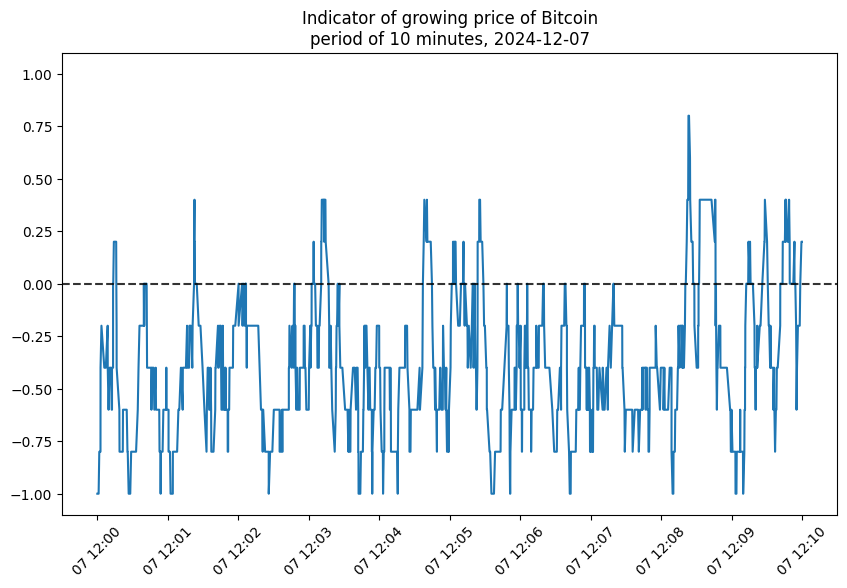

In [180]:
N = 10

plt.figure(figsize=(10, 6))

y = df["target"].rolling(window=N).mean()[N:]
x = df['timestamp'][N:]

sample_range = (df['timestamp'] > '2024-12-07 12:00') * (df['timestamp'] < '2024-12-07 12:10')

plt.plot(x[sample_range], y[sample_range] * 2 - 1)
plt.ylim((-1.1, 1.1))
plt.title('Indicator of growing price of Bitcoin\nperiod of 10 minutes, 2024-12-07')
plt.axhline(0, c='black', linestyle='--', alpha=0.8)
# plt.yticks(ticks=[])
plt.xticks(rotation=45)


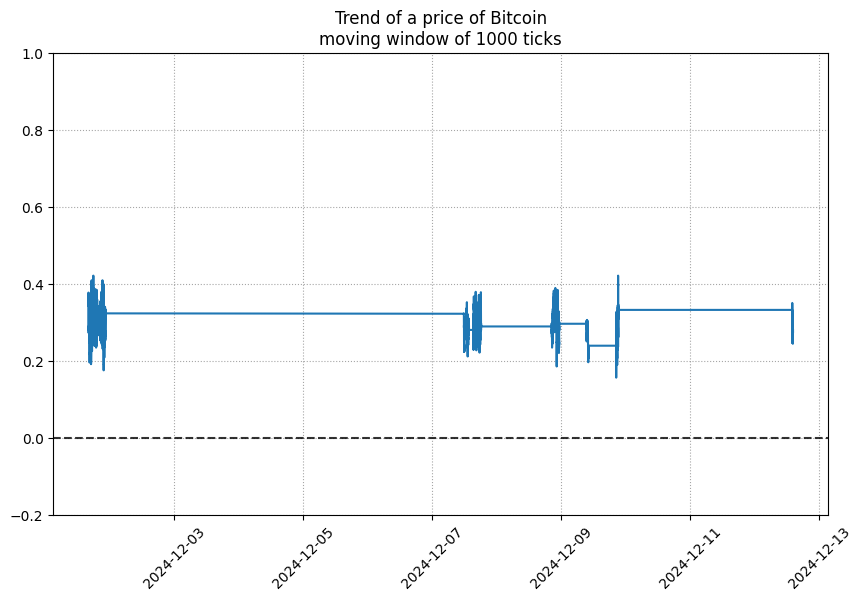

In [167]:
N = 1000

plt.figure(figsize=(10, 6))

y = df["target"].rolling(window=N).mean()[N:]
x = df['timestamp'][N:]

plt.plot(x, y)
plt.ylim((-0.2, 1))
plt.title(f"Trend of a price of Bitcoin\nmoving window of {N} ticks")
plt.axhline(0, c='black', linestyle='--', alpha=0.8)
plt.xticks(rotation=45)
plt.grid(which="major", linestyle=":", linewidth=0.8, color="gray", alpha=0.7)


## Transactions and prices

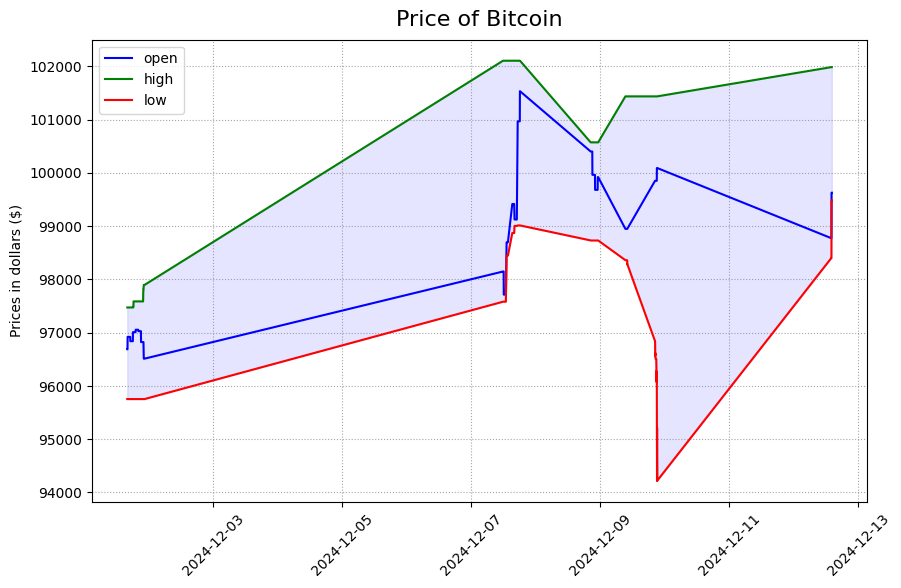

In [142]:
plt.figure(figsize=(10, 6))

plt.plot(df['timestamp'], df['open_24h'], c='blue', label='open')
plt.plot(df['timestamp'], df['high_24h'], c='green', label='high')
plt.plot(df['timestamp'], df['low_24h'], c='red', label='low')

plt.fill_between(df['timestamp'],
                 df['low_24h'],
                 df['high_24h'],
                 color='blue',
                 alpha=0.1)

plt.title('Price of Bitcoin', pad=10, fontsize=16)
plt.xticks(rotation=45)
plt.ylabel("Prices in dollars ($)")
plt.grid(which="major", linestyle=":", linewidth=0.8, color="gray", alpha=0.7)
plt.legend()


Text(0.5, 1.0, 'Observation per day')

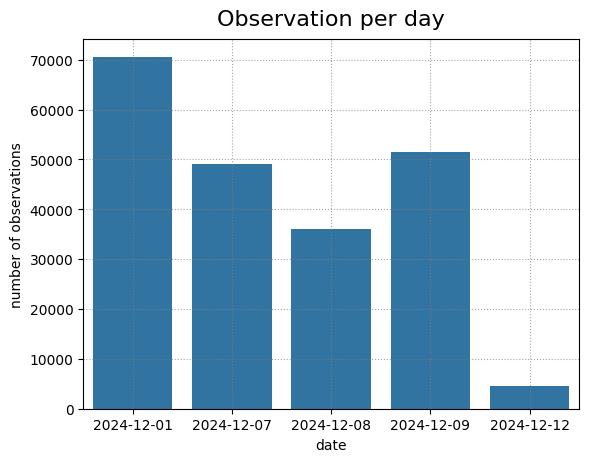

In [173]:
df['date'] = df['timestamp'].dt.date
temp = df.groupby('date').count()['price'].reset_index()
temp['date'] = temp['date'].astype(str)
sns.barplot(data=temp, x='date', y='price')

plt.ylabel('number of observations')
plt.grid(which="major", linestyle=":", linewidth=0.8, color="gray", alpha=0.7)
plt.title('Observation per day', pad=10, fontsize=16)

## Sentiment

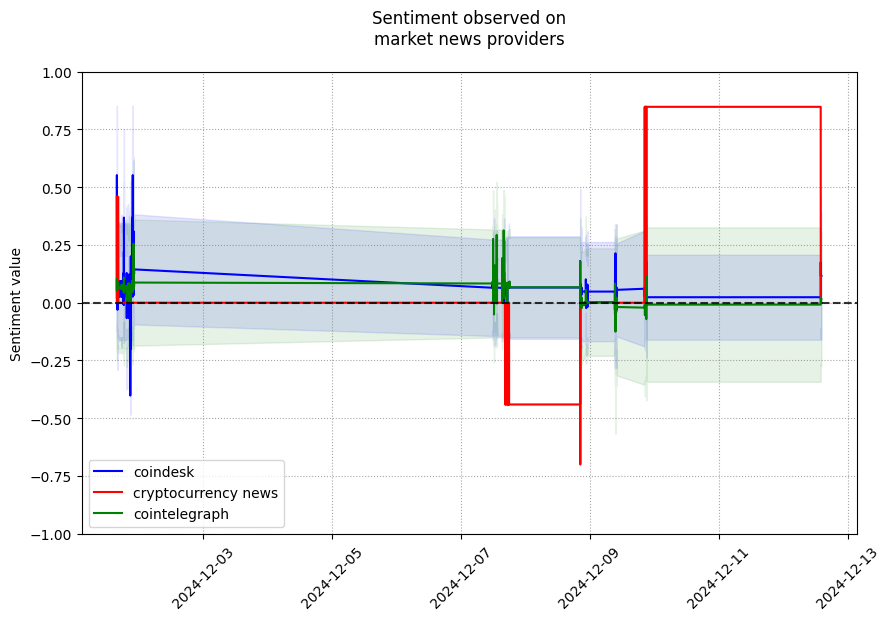

In [120]:
plt.figure(figsize=(10, 6))

plt.plot(df['timestamp'], 
         df['coindesk_avg_sentiment'], 
         color='blue',
         label='coindesk')
plt.fill_between(df['timestamp'],
                 df['coindesk_avg_sentiment'] - df['coindesk_std_sentiment'],
                 df['coindesk_avg_sentiment'] + df['coindesk_std_sentiment'],
                 color='blue',
                 alpha=0.1)

plt.plot(df['timestamp'], 
         df['cryptocurrency_news_avg_sentiment'], 
         color='red',
         label='cryptocurrency news')
plt.fill_between(df['timestamp'],
                 df['cryptocurrency_news_avg_sentiment'] - df['cryptocurrency_news_std_sentiment'],
                 df['cryptocurrency_news_avg_sentiment'] + df['cryptocurrency_news_std_sentiment'],
                 color='red',
                 alpha=0.1)

plt.plot(df['timestamp'], 
         df['cointelegraph_avg_sentiment'], 
         color='green',
         label='cointelegraph')
plt.fill_between(df['timestamp'],
                 df['cointelegraph_avg_sentiment'] - df['cointelegraph_std_sentiment'],
                 df['cointelegraph_avg_sentiment'] + df['cointelegraph_std_sentiment'],
                 color='green',
                 alpha=0.1)


plt.ylim((-1, 1))
plt.ylabel('Sentiment value')
plt.xticks(rotation=45)
plt.axhline(0, c='black', linestyle='--', alpha=0.8)
plt.legend()
plt.title('Sentiment observed on\nmarket news providers', pad=20)
plt.grid(which="major", linestyle=":", linewidth=0.8, color="gray", alpha=0.7)
